# Task 2 : Reconstructing using Random Fourier Features (RFF) [3 marks]

## Question 1

Image Reconstruction - Choose any image you like. Use Random Fourier Features (RFF) and Linear Regression to learn the mapping from the image coordinates (X, Y) to the pixel colors (R, G, B). Here, (X, Y) represents the coordinates of the pixels, and (R, G, B) represents the color values at those coordinates. Display both the original image and the reconstructed image. Also, calculate and report the Root Mean Squared Error (MSE) and Peak Signal-to-Noise Ratio (PSNR) between the original and reconstructed images. [1.5 Mark]

## RFF: Random Fourier Features

Random Fourier Features (RFF) is a technique used to approximate kernel functions in machine learning, especially in kernel-based methods like Support Vector Machines (SVM) or Gaussian Processes. Here, we are particularly interested in Gaussian Processes.

Kernel functions basically help in transforming data into a higher-dimensional space to make it easier to separate or learn patterns. However, directly using these kernels can be computationally expensive. RFF offers a way to make this process faster and more scalable.

Before diving into RFF, let's quickly go over what kernel functions are:

Kernel Functions compute the similarity between pairs of data points. For example, the Gaussian (RBF) kernel measures the similarity between two points based on their distance.

#### Gaussian (RBF) Kernel

$$
K(x, x') = \exp \left( -\frac{\| x - x' \|^2}{2 \sigma^2} \right)
$$

This kernel measures similarity based on the distance between $ x $ and $ x' $. It transforms data into a high-dimensional space where even subtle differences can be captured. $ \sigma $ is a parameter that controls the width of the Gaussian function.

By applying a kernel function, the data can be implicitly transformed into a higher-dimensional space, where it might become easier to separate with a linear decision boundary. This is known as the "kernel trick."

**A kernel function helps find patterns or relationships in your data that aren’t obvious in their original form by "lifting" them to a new space where things are easier to understand**.

<img src="./SCR-20240909-onej.png" width=1000>

Image Reconstruction: Each pixel in the image has coordinates (X, Y).
We want to figure out how to set the values of (R, G, B) at each coordinate, rather than memorizing every single pixel.

## Kernel Functions

Kernel functions are all fun and games until we have to compute them. Traditional kernel methods involve computing the kernel matrix, which requires calculating the similarity between every pair of data points. This results in a computational cost that grows rapidly with the number of data points, making it infeasible for large datasets.

RFF provides a way to approximate these kernels using a low-dimensional mapping that is easier to compute.

#### Fourier Transform of a function f(t):

The Fourier transform of a function $f(t)$ is given by:

$$
F(\omega) = \int_{-\infty}^{\infty} f(t) , e^{-i \omega t} , dt,
$$

where:

- $F(\omega)$ is the Fourier transform of the function $f(t)$.
- $f(t)$ is the original time-domain function.
- $\omega$ is the angular frequency (in radians per second).
- $i$ is the imaginary unit (where $i^2 = -1$).
- $e^{-i \omega t}$ is the complex exponential function.

Now, the Gaussian Distribution is given as:

$$
f(t) = \frac{1}{\sqrt{2 \pi \sigma^2}} \cdot e^{-\frac{(t - \mu)^2}{2 \sigma^2}}
$$

where:

- $f(x)$ is the probability density function of the Gaussian distribution.
- $\mu$ is the mean of the distribution.
- $\sigma$ is the standard deviation.
- $\sigma^2$ is the variance.
- $e$ is the base of the natural logarithm.

Complete this math...
we are taking the fourier transform of the gaussian function and then taking random fourier features out of it and then doing something...

Finally, we reach this approximation of RBF using RFF:

$$
k(x, y) \approx \frac{1}{D} \sum_{i=1}^{D} \cos(w_i \cdot (x - y))
$$

where:

- k(x, y) represents the kernel function.
- D is the total number of dimensions.
- w_i is a vector in the i-th dimension.
- x and y are input vectors.

The more random samples D we use, the closer our approximation will be to the true RBF kernel.

After approximating the RBF kernel using Random Fourier Features (RFF), we use the transformation z(x) to map each input data point x to a lower-dimensional feature space. This new feature space is usually much smaller in dimension than the original space required to compute the full RBF kernel matrix.

Instead of using kernel-based algorithms (like the Kernel SVM or Kernel Ridge Regression), use linear algorithms on the transformed features Z.

For example, we can now use linear regression with the new features. Because the kernel function is approximated in this lower-dimensional space, linear algorithms can now approximate the behavior of their nonlinear counterparts.

The result is an approximation of the original nonlinear kernel function with a linear model that is much easier to compute.

For this task, we basically need to approximate a mapping from pixel coordinates (X, Y) to pixel colors (R, G, B) using RFF and linear regression. We are given input data (X, Y) and we have to predict the output data (R, G, B) for each pixel in the image. So, we'll use RFF to learn this mapping and then use linear regression to predict the pixel colors.

#### Metrics for Evaluation

1. Root Mean Squared Error (RMSE): Measures the average squared difference between the original and reconstructed data (either pixel colors or audio amplitudes). Lower RMSE indicates better reconstruction.

$$
RMSE = \sqrt{\frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n}}
$$

2. Peak Signal-to-Noise Ratio (PSNR): Used for images; higher PSNR generally indicates better image reconstruction quality.

$$
PSNR = 20 \log_{10}\left(\frac{MAX_I}{RMSE}\right)
$$

# extra stuff

A kernel function takes two inputs (usually vectors representing data points) and returns a scalar value representing the similarity between them. Mathematically, a kernel function $ K(x, x') $ computes the dot product of two vectors $ x $ and $ x' $ after transforming them into a higher-dimensional feature space.

Formally:

$$
K(x, x') = \phi(x) \cdot \phi(x')
$$

Here:

- $ K(x, x') $ is the kernel function.
- $ x $ and $ x' $ are the input vectors (data points).
- $ \phi(x) $ is a mapping of the input vector $ x $ to a high-dimensional feature space.
- The dot product $ \phi(x) \cdot \phi(x') $ represents the similarity between the two data points in this high-dimensional space.

**What does dot product have to do anything with similarity?**

The dot product is a mathematical operation that combines two vectors to produce a single number. It measures how much one vector extends in the direction of another vector. In simple terms, it helps quantify the similarity between two vectors.

- If the dot product is large, the vectors are similar and point in similar directions.
- If it's small or zero, the vectors are less similar or orthogonal (perpendicular).

**Intuitive Explanation of the Kernel Trick**

Imagine you have data points that are not linearly separable in 2D. By applying a transformation to a higher-dimensional space (e.g., mapping from 2D to 3D), these points may become linearly separable. However, computing this transformation explicitly is expensive. Instead, the kernel function calculates the dot product in this higher-dimensional space directly from the original input space, effectively achieving the same result without the high computational cost.

In your assignment, you're using Random Fourier Features (RFF) to approximate a kernel function. This is because kernel functions can capture complex patterns in images and audio that simple linear models cannot. By approximating a kernel function with RFF, you're transforming the input data (like pixel coordinates or time points) into a feature space where a linear model can learn these complex patterns more effectively.

Credits: https://gregorygundersen.com/blog/2019/12/10/kernel-trick/, https://teddykoker.com/2020/11/performers/, https://samanemami.medium.com/understanding-random-fourier-features-for-kernel-approximation-e71d5cbd0bdf

<img src="./SCR-20240909-onej.png" width=1000>

# Mathematics

<img src="./SCR-20240909-onvy-2.png" width=1000>

We don't know SVM, so we will not try to understand those mathematical expressions but the explanation given is enough for us to understand the concept of the kernel trick.

<img src="./SCR-20240909-opho.png" width=1000>

Now, using RFF we will further simplify the kernel trick to make it computationally efficient by using an approximation technique.

<img src="./SCR-20240909-orqj-2.png" width=1000>

We can break down kernals into a sum of sines and cosines and then approximate them using random features. This is the essence of Random Fourier Features (RFF).

The spectral density describes the distribution of frequencies present in the kernel. This spectral density can be thought of as a probability density function, indicating the likelihood of each frequency component occurring. Understanding this density helps us to understand how the kernel behaves across different frequencies.

Instead of dealing with an infinite number of frequency components, which can be impractical, we approximate the kernel function using randomly chosen frequency components. These random Fourier features act as a representative subset of all possible frequencies.

**Feature Mapping**: Each random frequency component corresponds to a feature in a higher-dimensional space. We map our original data points into this higher-dimensional space using these features. This mapping enables us to capture complex relationships between data points more effectively.

## Simpler mathematical idea
### Feature Mapping

Assume you have a feature mapping function $ \phi $ that transforms data from the original space into a high-dimensional space. For data points $ x $ and $ x' $, the kernel function computes the dot product in this high-dimensional space:

$$
K(x, x') = \phi(x) \cdot \phi(x')
$$

### Types of Kernels

#### Linear Kernel

$$
K(x, x') = x \cdot x'
$$

This is just the dot product in the original space.

#### Polynomial Kernel

$$
K(x, x') = (x \cdot x' + c)^d
$$

This maps data into a higher-dimensional space where polynomial relationships can be captured. Here, $ c $ is a constant and $ d $ is the degree of the polynomial.

#### Gaussian (RBF) Kernel

$$
K(x, x') = \exp \left( -\frac{\| x - x' \|^2}{2 \sigma^2} \right)
$$

This kernel measures similarity based on the distance between $ x $ and $ x' $. It transforms data into a high-dimensional space where even subtle differences can be captured. $ \sigma $ is a parameter that controls the width of the Gaussian function.

**Conclusion**: Using RFF with linear regression allows you to reconstruct complex signals (like images or audio) by approximating the underlying function mapping the input space (e.g., pixel coordinates or time) to output space (color or amplitude). It leverages the idea that many signals can be represented as a combination of simple sinusoidal functions (via Fourier features), and learning this representation can be more efficient than directly fitting to the original data.

---

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics import pairwise_distances
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F

# Remove all the warnings
import warnings
warnings.filterwarnings('ignore')

# Set env CUDA_LAUNCH_BLOCKING=1
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Retina display
%config InlineBackend.figure_format = 'retina'

try:
    from einops import rearrange
except ImportError:
    %pip install einops
    from einops import rearrange

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 714.3 kB/s eta 0:00:00


In [3]:
def load_image(path):
  if (os.path.exists(path)):
    # read the image using torchvision and convert it to tensor because the model expects a tensor
    img = torchvision.io.read_image("borgir.jpg")
    print("Tensor shape: ", img.shape)
    # rearrange the image to be in the expected format i.e. (H W C)
    plt.imshow(rearrange(img, 'c h w -> h w c').numpy())
    return img
  else:
    print("File not found")
    return None

Tensor shape:  torch.Size([3, 1080, 1920])


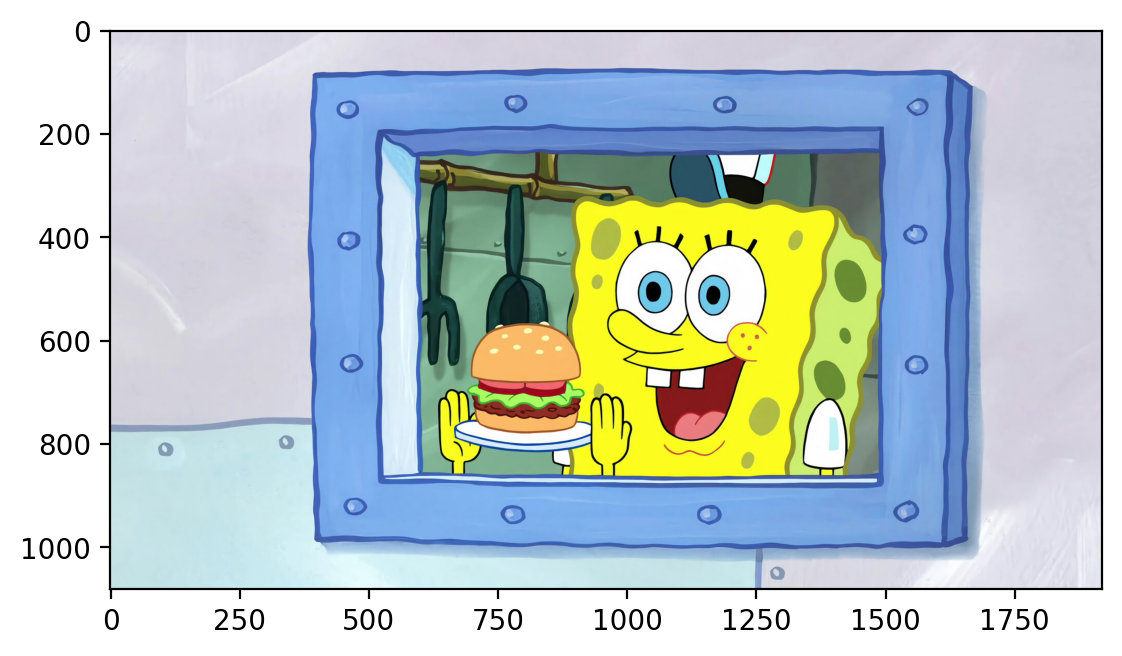

In [6]:
image_path = "borgir.jpg"
image = load_image(image_path)

In [8]:
def normalize_image(image): # normalize the image to 0 - 1 values
  # store the shape of the original image for future use
  original_image = image.shape
  scaler = preprocessing.MinMaxScaler()
  # flatten
  image = image.reshape(-1, 1)
  scaler.fit(image)
  scaled_image = scaler.transform(image).reshape(original_image)
  return scaled_image

In [10]:
def crop_image(image, crop_size, start_x, start_y): # crop a given image tensor with specified crop size and x, y start values
  cropped_image = torchvision.transforms.functional.crop(image.cpu(), start_x, start_y, crop_size, crop_size) # x.cpu() moves the tensor from gpu to cpu
  print("Cropped image shape: ", cropped_image.shape)
  plt.imshow(rearrange(cropped_image, 'c h w -> h w c').cpu().numpy())
  return cropped_image

Cropped image shape:  torch.Size([3, 300, 300])


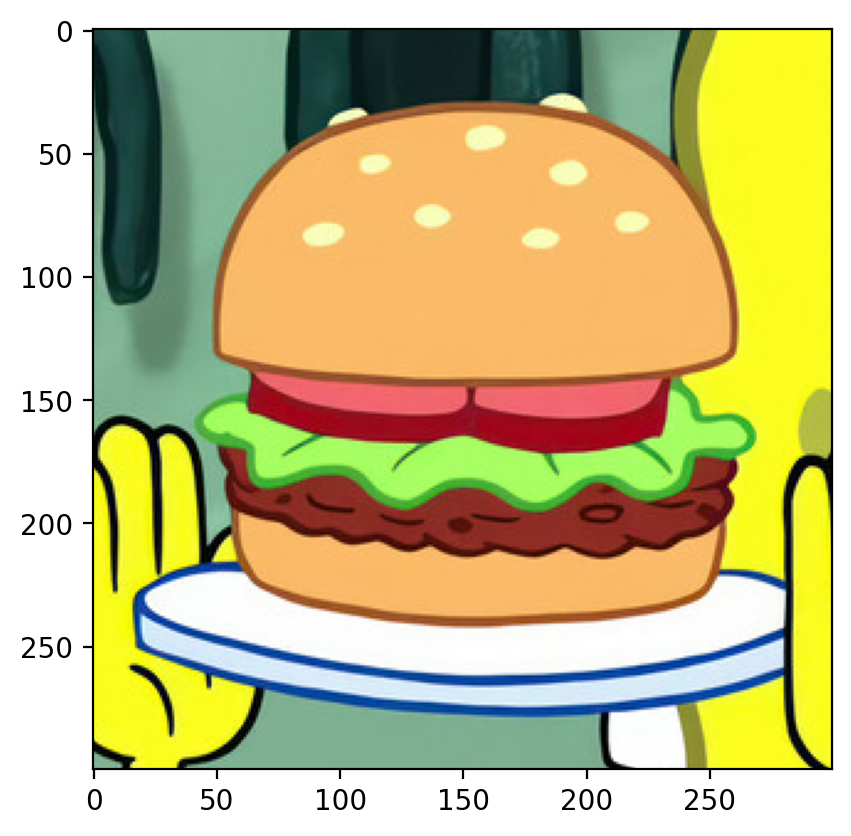

In [11]:
normalized_image = normalize_image(image)
torch_image = torch.tensor(normalized_image)
cropped_image = crop_image(torch_image, 300, 537, 650)

In [12]:
def extract_coordinates_pixels(image): # given an image this function returns coords array and their corresponding pixel values
  channels, height, width = image.shape
  coords = []

  for y in range(height):
    for x in range(width):
      coords.append([x, y])

  coords = torch.tensor(coords, dtype=torch.float32)
  pixel_values = rearrange(image, 'c h w -> (h w) c').float()

  print("Coordinates shape: ", coords.shape)
  print("Pixel values shape: ", pixel_values.shape)
  return coords.to(device), pixel_values.to(device)

In [13]:
coords, pixels = extract_coordinates_pixels(cropped_image)

Coordinates shape:  torch.Size([90000, 2])
Pixel values shape:  torch.Size([90000, 3])


In [15]:
def normalize_tensor(tensor): # given a tensor, this function normalizes it to -1 to 1 range
    scalar = preprocessing.MinMaxScaler(feature_range=(-1, 1))
    # tensor = tensor.reshape(-1, 1)
    scalar.fit(tensor.cpu())
    scaled_tensor = scalar.transform(tensor.cpu()).reshape(tensor.shape)
    scaled_tensor = torch.tensor(scaled_tensor, dtype=torch.float32).to(device)
    return scaled_tensor

In [16]:
coords = normalize_tensor(coords)

In [18]:
def create_linear_model(input_dim, output_dim):
  return nn.Linear(input_dim, output_dim).to(device) # nn is the neural network module, Linear creates a linear layer of it

In [19]:
model = create_linear_model(2, 3)
model.to(device)

Linear(in_features=2, out_features=3, bias=True)

In [20]:
def train(coords, pixels, model, learning_rate=0.01, epochs=1000, threshold=1e-6, verbose=True):
    """
    Train the model with early stopping based on loss change.

    coords: torch.Tensor of shape (num_samples, 2) - the 2D coordinate map.
    pixels: torch.Tensor of shape (num_samples, num_channels) - the pixel values.
    model: torch.nn.Module - the model to train.
    learning_rate: float - the learning rate for the optimizer.
    epochs: int - the maximum number of epochs for training.
    verbose: bool - whether to print progress messages.
    threshold: float - the threshold for early stopping based on the change in loss.

    Returns: the final loss value (float).
    """

    criterion = nn.MSELoss() # define the loss function (mse)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # use the adm optimizer with the specified learning rate
    previous_loss = float('inf') # initialize w very large value (for early stopping)

    # training loops
    for epoch in range(epochs):
        optimizer.zero_grad() # reset the gradient of the optimizer
        outputs = model(coords) # compute the output
        loss = criterion(outputs, pixels) # calculate the loss that we defined earlier
        loss.backward() # compute teh gradients of the loss with respect to the parameters
        optimizer.step() # update the parameters based on the gradients computed above

        # check for early stopping
        if abs(previous_loss - loss.item()) < threshold:
            print(f"Stopping early at epoch {epoch} with loss: {loss.item():.6f}")
            break

        previous_loss = loss.item() # update the previous loss

        if verbose and epoch % 100 == 0:
            print(f"Epoch {epoch} loss: {loss.item():.6f}")

    return loss.item()


Why are we setting model to evaluation mode?

When we train a neural network, certain layers like dropout and batch normalization behave differently to help the model learn better.

Dropout randomly turns off some neurons to prevent overfitting.
Batch normalization adjusts and scales the output based on the batch of data being processed to help with training stability.

However, during evaluation (when we use the model to make predictions), we don't want these layers to behave this way.

Instead, you want them to use their learned settings from training without any randomness.

Basically, it tells the model that you are in evaluation mode, not training mode.



In [21]:
def plot_reconstructed_and_original_image(original_image, model, coords, title=""):
    """
    Plot the reconstructed image and the original image.

    Model: torch.nn.Module
    X: torch.Tensor of shape (num_samples, 2) - the coordinate map.
    original_image: torch.Tensor of shape (num_channels, height, width) - the original image.

    Returns: None
    """
    num_channels, height, width = original_image.shape
    model.eval() # set the model to evaluation mode which disables dropout and batch normalization which are just features required for training and not for testing
    with torch.no_grad(): # disable gradient calculation as we don't need it for visualizing to speed up the process
        outputs = model(coords)
        outputs = outputs.reshape(height, width, num_channels)

    fig = plt.figure(figsize=(6, 4))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) # this allows us to create a flexible grid layout for plotting multiple subplots

    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])

    ax0.imshow(outputs.cpu())
    ax0.set_title("Reconstructed Image")

    ax1.imshow(original_image.cpu().permute(1, 2, 0))
    ax1.set_title("Original Image")

    for a in [ax0, ax1]:
        a.axis("off")

    fig.suptitle(title, y=0.9)
    plt.tight_layout()

The following function generates Random Fourier Features (RFF) from an input tensor to approximate a kernel function (the guassian or radial basis function in our case).

The RBF kernel formula is:

$$
K(x, x') = \exp\left(-\frac{\|x - x'\|^2}{2\sigma^2}\right)
$$

where:
- $ K(x, x') $ is the kernel value between two input vectors $ x $ and $ x' $.
- $ \|x - x'\|^2 $ is the squared Euclidean distance between the vectors $ x $ and $ x' $.
- $ \sigma $ is the kernel width parameter (often called the "bandwidth").

It basically tries to capture non-linear relationships by transforming the input tensor into a new feature space using RFF.

num_features is the number of random fourier features to generate. The choice of this number significantly affects both the performance and the computational cost. There isn't any general number or a formula for this but rather a trade-off between approximation and computation cost. The more features we generate, the better approximation we get but the computation cost increases significantly as well.

The parameter 𝜎 determines the "width" of the gaussian function used in the RBF kernel. A smaller value results in a narrow gaussian function meaning the kernel will only consider points that are very close to each other as similar which can lead to overfitting. A larger value means that kernel will consider points that are far apart as similar which can lead to underfitting.

In determining the optimal σ value for the RBF kernel, we utilized a combination of empirical testing and heuristic methods. We explored a range of σ values, both large and small, to observe their effects on model performance. Despite our efforts, no general formula for σ emerged, and consultations with our instructor and teaching assistants did not provide a definitive solution.

In [24]:
# create RFF features
def create_rff_features(tensor, num_features, sigma):
    rff = RBFSampler(n_components=num_features, gamma=1/(2 * sigma**2)) # create an RBFSampler object with specified number of features and gamma value
    tensor = tensor.cpu().numpy()
    tensor = rff.fit_transform(tensor) # apply the RBFSampler to transform the tensor
    return torch.tensor(tensor, dtype=torch.float32).to(device)

In [25]:
image_rff = create_rff_features(coords, 60000, 0.008) # parameters are coordinates, number of features, and sigma

In [ ]:
image_rff.shape

torch.Size([90000, 60000])

In [31]:
model = create_linear_model(image_rff.shape[1], 3) # create the linear model
model.to(device)

train(image_rff, pixels, model, learning_rate=0.01, epochs=1000, threshold=1e-6, verbose=True) # train the model

Epoch 0 loss: 0.459408
Epoch 100 loss: 0.019053
Epoch 200 loss: 0.005953
Epoch 300 loss: 0.002299
Epoch 400 loss: 0.001253
Epoch 500 loss: 0.000993
Stopping early at epoch 511 with loss: 0.000981


0.0009807696333155036

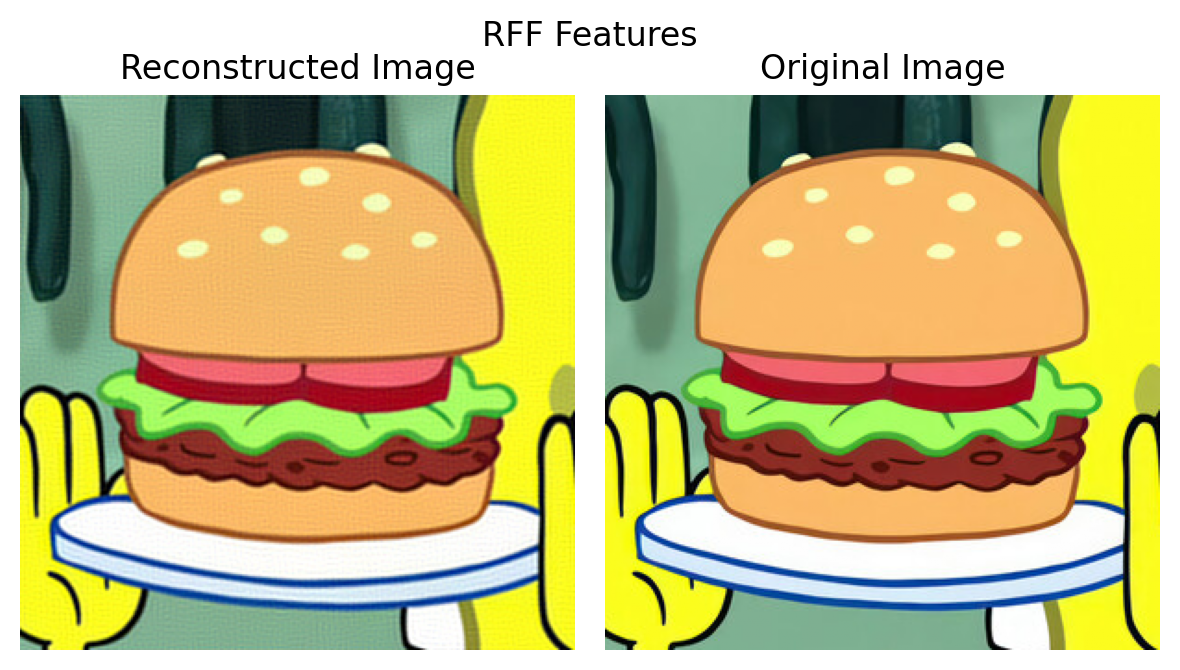

In [32]:
plot_reconstructed_and_original_image(cropped_image, model, image_rff, title="RFF Features")

In [33]:
def get_reconstructed_image(model, coords, image_rff, height, width):
  model.eval()
  with torch.no_grad():
    outputs = model(image_rff)
    outputs = outputs.reshape(height, width, 3)
  return outputs

In [48]:
reconstructed_image = get_reconstructed_image(model, coords, image_rff, 300, 300)
reconstructed_image = rearrange(reconstructed_image, 'c h w -> w h c').cpu()

In [49]:
!pip install torchmetrics

from torchmetrics.functional.image import peak_signal_noise_ratio
from torchmetrics.functional.regression import mean_squared_error

# Calculate and report the RMSE and PSNR metrics.
def metrics(cropped_image, image_rff):
    rmse = mean_squared_error(target = cropped_image,
                             preds=image_rff,
                             squared=False)
    psnr = peak_signal_noise_ratio(target=cropped_image,
                                   preds=image_rff)
    return rmse, psnr

In [50]:
rmse, psnr = metrics(cropped_image.transpose(1, 2).reshape(-1, 1), reconstructed_image.reshape(-1, 1))
print("RMSE: ", rmse)
print("PSNR: ", psnr)

RMSE:  tensor(0.0313, dtype=torch.float64)
PSNR:  tensor(30.0887, dtype=torch.float64)
